## 1-7. 첫 번째 머신러닝 실습, 간단하고도 빠르게! <br> (4) 다른 모델도 해 보고 싶다면? 코드 한 줄만 바꾸면 돼!

첫 번째 모델을 학습도 시켜보고, 성능도 평가해봤으니 이제는 다른 모델들도 활용해 보겠습니다!

다른 모델들을 사용하는 것 또한, 편리하게 설계된 scikit-learn 덕분에 아주 간단합니다. scikit-learn을 사용하는 것에 익숙해진다면 심지어 한 줄의 코드만 수정해도 된다고요!

다른 모델들을 다루기 전에 위에서 사용했던 Decision Tree 모델을 학습시키고 예측하는 과정을 한 번에 담아보겠습니다.

In [2]:
# (1) 필요한 모듈 import
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# (2) 데이터 준비
iris = load_iris()
iris_data = iris.data
iris_label = iris.target

# (3) train, test 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

# (4) 모델 학습 및 예측
decision_tree = DecisionTreeClassifier(random_state=32)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.91      0.83      0.87        12
           2       0.83      0.91      0.87        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



어떤가요? 위에서 여러 가지를 배우면서 진행해서 굉장히 길게 늘어졌던 과정이 사실은 이렇게나 짧고 간단합니다.

여기서 모델을 바꿔보고 싶다면 (4) 모델 학습 및 예측 부분에서 모델만 바꿔주면 되죠.<br> 모델이 바뀐다고 해도 위와 같이 진행되는 큰 흐름은 변하지 않으니 이 흐름을 잘 기억해두도록 합시다!

Random Forest
이 외에 간단히 활용해 볼 수 있는 모델들을 만나보겠습니다. 먼저, Decision Tree를 여러 개 모아놓은 Random Forest입니다.

이전 스텝에서 Random Forest는 Decision Tree 모델을 여러 개 합쳐놓음으로써 Decision Tree의 단점을 극복한 모델이라고 소개했죠.<br>
이러한 기법을 앙상블(Ensemble) 기법이라고 합니다.<br>
단일 모델을 여러 개 사용하는 방법을 취함으로써 모델 한 개만 사용할 때의 단점을 집단지성으로 극복하는 개념이죠.<br>
아래 참고 자료는 텐서플로우 허브를 사용하였습니다.

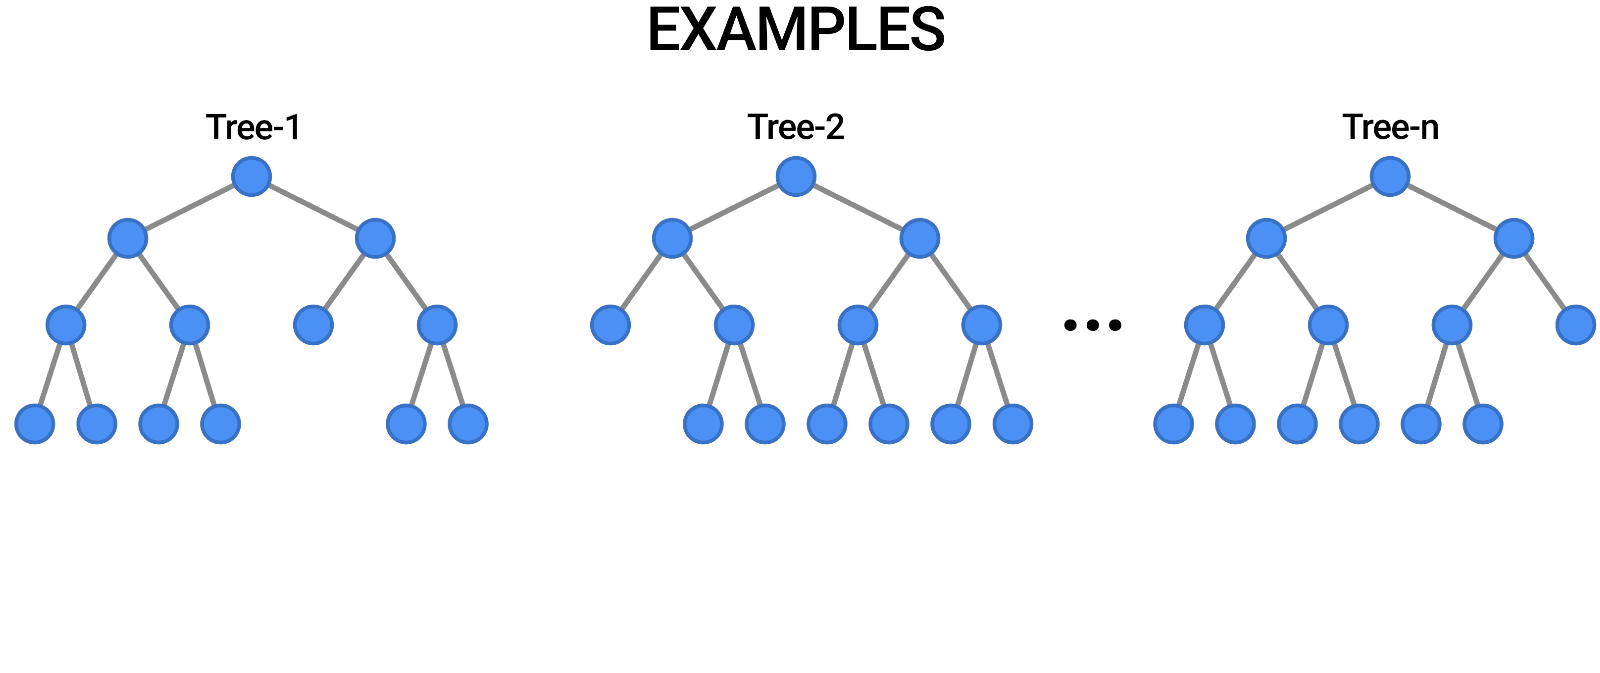

예를 들어 건강 위험도를 예측하려면 성별, 키, 몸무게 세 가지 요소보다 더 많은 요소를 고려하는 것이 바람직할 것입니다. <br>
거주지역, 운동량, 기초 대사량, 근육량 등 수많은 요소도 건강에 큰 영향을 미칩니다. <br>
다른 요소들의 조합으로 두 번째 의사 결정 트리를 생성할 수도 있습니다.<br>
성별, 키, 흡연 여부, 근육량으로 두 번째 트리를 만들고, 키, 거주지역, 운동량으로 세 번째 트리를 만들 수도 있겠지요.<br>
(통계적으로는 독립 조건을 만들어 주기 위함입니다.)

이렇게 많은 의사 결정 트리로 ‘숲’을 만들었는데, 의견 통합이 되지 않는다면 어떻게 해야 할까요? 이 역시 현실과 비슷합니다.<br> 의견 통합이 이루어지지 않을 경우 다수결의 원칙을 따르듯이, 저희의 의사 결정 ‘숲'도 투표로 결정을 내리게 됩니다.<br> 1,000개의 의사 결정 트리 중 678개의 트리가 건강 위험도가 높다고 의견을 내고,<br>  나머지는 위험도가 낮다는 의견을 냈을 경우, <br> 숲은 그 의견들을 통합하여 건강 위험도가 높다고 하는 것이죠. <br> 

데이터 사이언스에서는 이렇게 의견을 통합하거나 여러가지 결과를 합치는 방식을 “앙상블” (Ensemble method) 이라고 합니다.

Random Forest의 Random은 무엇이 무작위적이라는 것일까요?<br> Random Forest는 각각의 의사 결정 트리를 만드는데 있어 쓰이는 요소들 (흡연 여부, 나이, 등등)을 무작위적으로 선정합니다. <br>건강 위험도를 30개의 요소로 설명할 수 있으면, 의사 결정 트리의 한 단계를 생성하면서 모든 요소들을 고려하지 않습니다.<br> 30개 중 무작위로 일부만 선택하여, 그 선택된 일부 중 가장 건강 위험도를 알맞게 예측하는 한 가지 요소가 의사 결정 트리의 한 단계가 됩니다

다음은 Random Forest가 완성되는 과정입니다.

1.건강의 위험도를 예측하기 위해서는 많은 요소를 고려 성별, 키, 몸무게, 지역, 운동량, 흡연유무, 음주 여부, 혈당, 근육량, 기초 대사량 등 수많은 요소가 필요<br>

2.Feature가 30개라 했을 때 30개의 Feature를 기반으로 하나의 결정 트리를 만든다면 트리의 가지가 많아질 것이고, 이는 오버피팅의 결과를 야기<br>

3.30개의 Feature 중 랜덤으로 5개의 Feature만 선택해서 하나의 결정 트리 생성 <br>

4.계속 반복하여 여러 개의 결정 트리 생성<br>

5.여러 결정 트리들이 내린 예측 값들 중 가장 많이 나온 값을 최종 예측값으로 지정<br>

6.이렇게 의견을 통합하거나 여러 가지 결과를 합치는 방식을 앙상블(Ensemble)이라고 함<br>

7.하나의 거대한 (깊이가 깊은) 결정 트리를 만드는 것이 아니라 여러 개의 작은 결정 트리를 만드는 것<br>

8.분류 : 여러 개의 작은 결정 트리가 예측한 값들 중 가장 많은 값, 회귀 : 평균<br>

Random Forest는 상위 모델들이 예측하는 편향된 결과보다, <br>

다양한 모델들의 결과를 반영함으로써 더 다양한 데이터에 대한 의사결정을 내릴 수 있게 합니다.

이러한 이유로 Random Forest는 sklearn.ensemble 패키지 내에 들어있습니다. 다음과 같이 사용할 수 있습니다.



In [5]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(iris_data, 
                                                    iris_label, 
                                                    test_size=0.2, 
                                                    random_state=21)

random_forest = RandomForestClassifier(random_state=32)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## 다른 scikit-learn 내장 분류모델

Support Vector Machine (SVM)  

SVM은 Support Vector와 Hyperplane(초평면)을 이용해서 분류를 수행하게 되는 대표적인 선형 분류 알고리즘입니다.

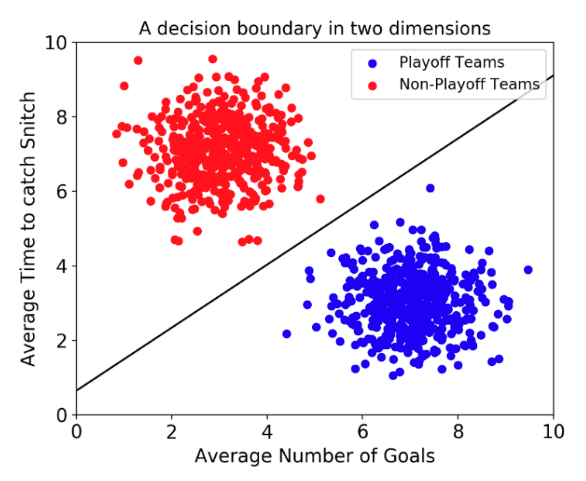

2 차원 공간에서, 즉 데이터에 2개의 클래스만 존재할 때,

*Decision Boundary(결정 경계)* :  두 개의 클래스를 구분해 주는 선<br>

*Support Vector* :  Decision Boundary에 가까이 있는 데이터<br>

*Margin* :  Decision Boundary와 Support Vector 사이의 거리


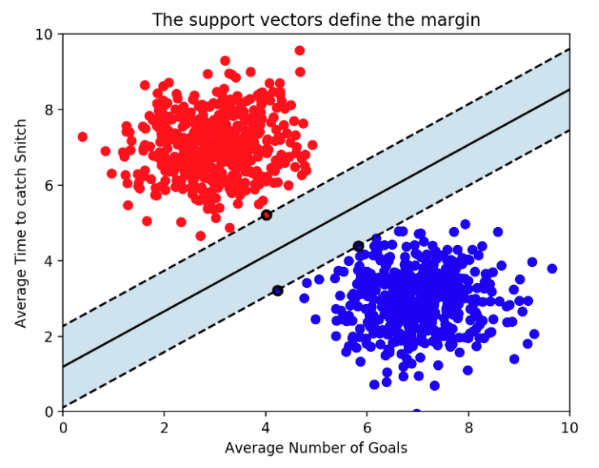

Margin이 넓을수록 새로운 데이터를 잘 구분할 수 있다. (Margin 최대화 -> robustness 최대화)

Kernel Trick: 저차원의 공간을 고차원의 공간으로 매핑해주는 작업. 데이터의 분포가 Linearly separable 하지 않을 경우 데이터를 고차원으로 이동시켜 Linearly separable하도록 만든다.

cost: Decision Boundary와 Margin의 간격 결정. cost가 높으면 Margin이 좁아지고 train error가 작아진다.<br>
그러나 새로운 데이터에서는 분류를 잘 할 수 있다. cost가 낮으면 Margin이 넓어지고, train error는 커진다.

γ: 한 train data당 영향을 미치는 범위 결정. γ가 커지면 영향을 미치는 범위가 줄어들고, Decision Boundary에 가까이 있는 데이터만이 선의 굴곡에 영향을 준다.<br> 따라서 Decision Boundary는 구불구불하게 그어진다. (오버피팅 초래 가능) 작아지면 데이터가 영향을 미치는 범위가 커지고,<br> 대부분의 데이터가 Decision Boundary에 영향을 준다. 따라서 Decision Boundary를 직선에 가까워진다.

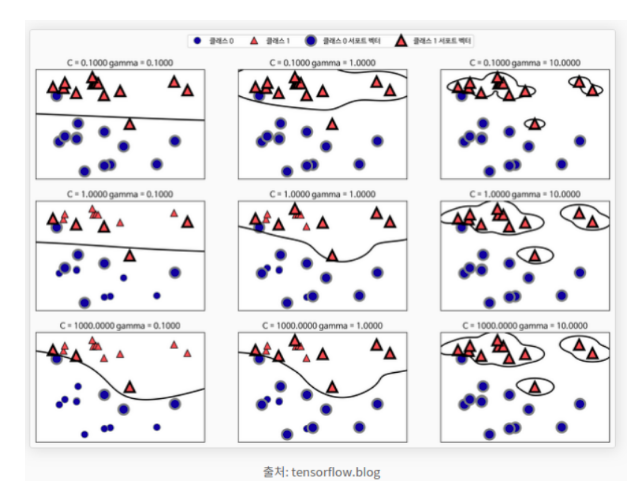

많은 선형 분류 모델은 대부분 이진 분류 모델입니다. <br>
그런데 이진 분류 알고리즘을 일대다(one-vs.-rest 또는 one-vs.-all) 방법을 사용해 다중 클래스 분류 알고리즘으로 사용할 수 있습니다.<br>
일대다 방식은 각 클래스를 다른 모든 클래스와 구분하도록 이진 분류 모델을 학습시킵니다.<br>
클래스의 수만큼 이진 분류 모델이 만들어지고 예측할 때는 만들어진 모든 이진 분류기가 작동하여 가장 높은 점수를 내는 분류기의 클래스를 예측값으로 선택합니다.<br> 그리고 SVM 모델은 다음과 같이 사용합니다.



In [7]:
from sklearn import svm
svm_model = svm.SVC()

print(svm_model._estimator_type)

classifier


Q11. SVM 모델을 학습시키고, 결과를 확인해 보세요. 아래 코드 셀에서 실행한 후, 정답을 확인하세요.

In [9]:
svm_model.fit(X_train, y_train) #svm 모델을 학습시킨다.
y_pred = svm_model.predict(X_test)# svm 모델로 예측한걸 변수에 지정

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.91      0.83      0.87        12
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.89      0.90      0.89        30
weighted avg       0.91      0.90      0.90        30



## Stochastic Gradient Descent Classifier (SGDClassifier)
경사 하강법

SGD (Stochastic Gradient Descent)이란? 배치 크기가 1인 경사하강법 알고리즘 입니다. <br>
즉, 확률적 경사하강법은 데이터 세트에서 무작위로 균일하게 선택한 하나의 예를 의존하여 각 단계의 예측 경사를 계산합니다.

##### < 최소값을 찾는 과정 >



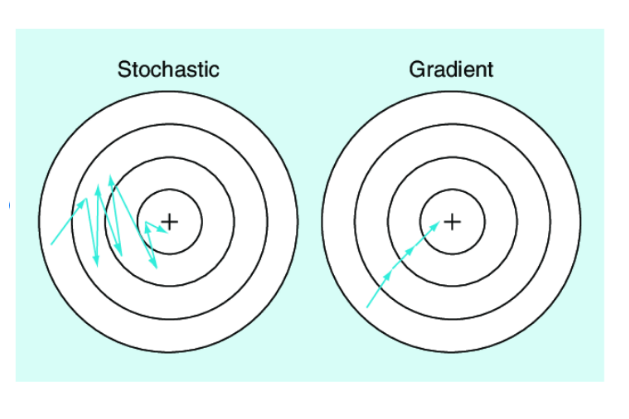

배치란? 경사하강법에서 배치는 단일 반복에서 기울기를 계산하는 데 사용하는 예(data)의 총 개수입니다.<br> Gradient Descent 에서의 배치는 전체 데이터 셋라고 가정합니다.

하지만 대규모의 작업에서는 데이터 셋에 수십억, 수천억 개의 예가 포함되는 경우가 많습니다.<br> 또한 대규모의 데이터 셋에는 엄청나게 많은 특성이 포함되어 있습니다.<br> 따라서 배치가 거대해질 수 있습니다. 배치가 너무 커지면 단일 반복으로도 계산하는 데 오랜 시간이 걸릴 수 있습니다.<br> 따라서 무작위로 샘플링된 예가 포함된 대량의 데이터 셋에는 중복 데이터가 포함되어 있을 수 있습니다. <br>실제로 배치 크기가 커지면 중복의 가능성도 그만큼 높아집니다.

**" 만약에 훨씬 적은 계산으로 적절한 기울기를 얻을 수 있다면 어떨까요? "**

데이터 세트에서 예(data)를 무작위로 선택하면 (노이즈는 있겠지만) 훨씬 적은 데이터 세트로 중요한 평균값을 추정할 수 있습니다.<br>
확률적 경사하강법(SGD)은 이 아이디어를 더욱 확장한 것으로서, 반복당 하나의 예(배치 크기 1)만을 사용합니다.<br>

'확률적(Stochastic)'이라는 용어는 각 배치를 포함하는 하나의 예가 무작위로 선택된다는 것을 의미합니다.

<단점> 반복이 충분하면 SGD가 효과는 있지만 노이즈가 매우 심합니다. 확률적 경사하강법의 여러 변형 함수의 최저점에 가까운 점을 찾을 가능성이 높지만 항상 보장되지는 않습니다. (최저점을 찾지 못할 수 있음)

<단점 극복하기> 미니 배치 확률적 경사하강법(미니 배치 SGD)는 전체 배치 반복과 SGD 의 절충안입니다.

미니 배치는 일반적으로 무작위로 선택한 10개에서 1,000개 사이의 예로 구성됩니다.  
미니 배치 SGD는 SGD의 노이즈를 줄이면서도 전체 배치보다는 더 효율적입니다.

SGD Classifier 모델은 다음과 같이 사용합니다.

In [10]:
from sklearn.linear_model import SGDClassifier
sgd_model = SGDClassifier()

print(sgd_model._estimator_type)

classifier


In [14]:
sgd_model.fit(X_train, y_train) #학습 _model.fit(X_train, y_train)
y_pred = sgd_model.predict(X_test) #y_pred = sgd_model.predict(X_test) 예측

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## Logistic Regression

Logistic Regression 모델에 대해 알아봅시다. 가장 널리 알려진 선형 분류 알고리즘. <br>
소프트맥스(softmas) 함수를 사용한 다중 클래스 분류 알고리즘이며, <br>
다중 클래스 분류를 위한 로지스틱 회귀를 소프트맥스 회귀(Softmax Regression)라고도 합니다.<br>
이름은 회귀지만, 실제로는 분류를 수행합니다.



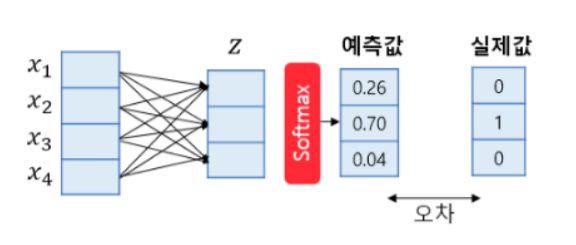

소프트맥스 함수:<br>

클래스가 N개일 때, N차원의 벡터가 각 클래스가 정답일 확률을 표현하도록 정규화를 해주는 함수.<br>
위의 그림은 4차원의 벡터를 입력으로 받아 3개의 클래스를 예측하는 경우의 소프트맥스 회귀의 동작 과정을 보여준다.<br> 
3개의 클래스 중 1개의 클래스를 예측해야 하므로 소프트맥스 회귀의 출력은 3차원의 벡터고, 각 벡터의 차원은 특정 클래스일 확률이다.<br>
오차와 실제값의 차이를 줄이는 과정에서 가중치와 편향이 학습됩니다.

Logistic Regression 모델은 다음과 같이 사용합니다.



In [15]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()

print(logistic_model._estimator_type)

classifier


In [16]:
logistic_model.fit(X_train, y_train)
y_pred = logistic_model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      0.83      0.91        12
           2       0.78      1.00      0.88         7

    accuracy                           0.93        30
   macro avg       0.93      0.94      0.93        30
weighted avg       0.95      0.93      0.93        30



## 1-8. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (1) 정확도에는 함정이 있다

위에서 우리는 정확도로 모델의 성능을 평가해 보았습니다. 하지만 정확도에는 치명적인 함정이 있죠.

어떤 함정이 있는지, 손글씨 데이터인 MNIST 데이터셋으로 확인해 보겠습니다.<br>
붓꽃 데이터를 사용했을 때처럼, 손글씨 데이터도 아래와 같은 코드로 간단히 가져올 수 있습니다.

In [17]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

digits 라는 변수에 손글씨 데이터를 저장했고, 그 안에는 iris 데이터와 똑같이 몇 가지의 정보들이 있군요.

가장 중요한 data를 먼저 확인해 보도록 하겠습니다.

In [18]:
digits_data = digits.data
digits_data.shape

(1797, 64)

In [19]:
digits_data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

데이터는 총 1,797개가 있고, 각 데이터는 64개의 숫자로 이루어져 있군요. 1,797개의 데이터 중 첫 번째 데이터를 샘플로 확인해 보겠습니다.

예상대로 64개의 숫자로 이루어진 배열(array)이 출력되었습니다. 각 숫자는 어떤 의미가 있을까요?

손글씨 데이터는 이미지 데이터입니다. 따라서 각 숫자는 픽셀값을 의미하죠. 길이 64의 숫자 배열은 사실 (8 x 8) 크기의 이미지를 일렬로 쭉 펴놓은 것입니다.
이미지는 어떻게 생겼는지 한 번 확인해 보겠습니다. 이미지를 보기 위해서는 matplotlib이라는 라이브러리가 필요합니다.

matplotlib.pyplot을 plt라는 이름으로 가져오고, 이미지를 현재 화면에 보여주기 위해 %matplotlib inline이라는 코드를 추가하겠습니다.

이미지는 다음과 같이 간단히 확인할 수 있습니다. 다만, 일렬로 펴진 64개 데이터를 (8, 8)로 reshape해주는 것을 잊으면 안 됩니다!

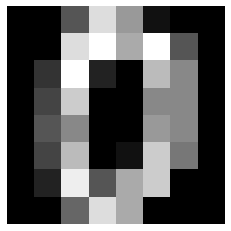

In [21]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(digits.data[0].reshape(8, 8), cmap='gray')
plt.axis('off')
plt.show()

0처럼 생긴 이미지가 보이는군요.

여러 개의 이미지를 한 번에 확인해 보겠습니다.

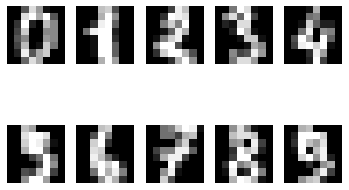

In [23]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

네, 해상도가 낮은 이미지이기 때문에 흐릿하지만, 마음의 눈으로 보면 0부터 9까지의 숫자를 볼 수 있습니다.

그렇다면 target 데이터는 어떨까요?

In [25]:
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

총 1,797개의 데이터가 있고, 0부터 9까지의 숫자로 나타나는군요. 바로 각 이미지 데이터가 어떤 숫자를 나타내는지를 담고 있는 데이터입니다.

그러면 우리는 어떤 문제를 풀어야 할까요?  

붓꽃 문제와 같이, 각 이미지 데이터가 입력되었을 때 그 이미지가 숫자 몇을 나타내는 이미지인지를 맞추는 분류 모델을 학습시키면 됩니다.  

다만 이번에는 정확도의 함정을 확인하는 실험이기 때문에 약간의 장치를 넣어볼 것입니다.  

숫자 10개를 모두 분류하는 것이 아니라, 해당 이미지 데이터가 3인지 아닌지를 맞히는 문제로 변형해서 풀어보는 것입니다.<br>
즉 입력된 데이터가 3이라면 3을, 3이 아닌 다른 숫자라면 0을 출력하도록 하는 모델을 생각해 보겠습니다.<br>

그러려면 target인 digits_label을 아래와 같이 살짝 변형할 필요가 있습니다.

In [27]:
new_label = [3 if i == 3 else 0 for i in digits_label]
new_label[:20]

[0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0]

네, 기존의 label인 digits_label에서 숫자가 3이라면 그대로 3을, 아니라면 0을 가지는 new_label을 만드는 거죠.

이제 이 문제를 풀기 위해 다시 Decision Tree를 학습시켜보겠습니다. 모델 학습은 아주 간단했던 것, 기억하시죠? 직접 코드를 짜보세요!  
<br>
(힌트! train_test_split으로 학습 데이터와 테스트 데이터를 만든 후, <br>
모델을 fit 시키고, predict를 통해 예측 결과를 만든 후 accuracy_score를 이용해 정확도를 측정하는 순서로 진행하세요.)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(digits_data,
                                                    new_label,
                                                    test_size=0.2,
                                                    random_state=15)

decision_tree = DecisionTreeClassifier(random_state=15)
decision_tree.fit(X_train, y_train)
y_pred = decision_tree.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9388888888888889

약 93.9%라는 높은 성능이 나왔군요! 👏🏼👏🏼👏🏼

바로 이곳에 함정이 있습니다. 어떤 함정일까요? 우리가 풀려고 했던 문제를 생각해봅시다.<br>
총 10개의 숫자 중 3에만 집중을 해서, 3이라면 3으로, 3이 아니라면 0으로 맞추는 문제로 변형했었죠.<br>


그런 이유로, 정답 데이터인 label은 0이 매우 많고 3은 적은 불균형 데이터가 되었습니다.<br>
9개의 숫자들은 label이 모두 0이 되었고, 3만 3으로 남아있었으니 대략 90%의 label이 모두 0이라는 이야기가 되죠.<br>

이것은 무엇을 의미할까요? 잠시 생각해봅시다. 🤔

네, 바로 모델이 전혀 학습하지 않고 정답을 모두 0으로만 선택해도 정확도가 90%가량이 나오게 된다는 것입니다. 실제로 확인해 보죠.

길이는 y_pred와 같으면서 0으로만 이루어진 리스트를 fake_pred라는 변수로 저장해 보고,<br>
이 리스트와 실제 정답인 y_test간의 정확도를 확인해 보겠습니다.



In [31]:
fake_pred = [0] * len(y_pred) # 길이는 y_pred와 같지만 0으로만 이루어진 리스트

accuracy = accuracy_score(y_test, fake_pred)
accuracy

0.925

어떤가요? 우리는 어떠한 모델을 사용하지 않고 답을 0으로만 찍었을 뿐인데, 정확도가 92.5%가 나옵니다.

이러한 문제는 불균형한 데이터, unbalanced 데이터 에서 자주 발생할 수 있습니다.

즉 정확도는 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도가 될 수 있는 것이죠.

그렇기 때문에 분류 문제에서는 정확도 외에 다양한 평가 척도를 사용합니다. 무엇이 있는지 이제부터 알아보도록 하겠습니다.

## 1-9. 내 모델은 얼마나 똑똑한가? 다양하게 평가해 보기 (2) 정답과 오답에도 종류가 있다!

위에서 확인한 정확도는 전체 데이터 중 맞은 데이터 만 신경 쓰는 척도입니다. 하지만 양성 데이터를 얼마나 많이 맞았느냐도 중요하겠지만, 음성 데이터를 얼마나 안 틀렸느냐도 중요한 경우가 있습니다. 이는 문제에 따라 달라지죠.

예를 들어 코로나바이러스에 감염되었는지 얼마나 많은 의심되는 환자를 진단하는 경우, 실제 음성인데 양성으로 오진을 하면 그나마 환자에게는 다행인 일입니다. 하지만 실제 양성인데 음성이라고 오진을 하는 경우는 환자에게 치명적인 상황이 될 것입니다.

이렇게 정답과 오답을 구분하여 표현하는 방법을 오차 행렬(confusion matrix) 이라고 합니다

오차 행렬(confusion Matrix,혼동행렬)은 학습된 분류 모델이 예측을 수행하면서 얼마나 헷갈리고 (confused) 있는지도 함께 보여주는 지표이다. 즉, 이진 분류의 예측 오류가 얼마인지와 더불어 어떠한 유형의 예측 오류가 발생하고 있는지를 함께 나타내는 지표이다.


TN(True Negative): 예측값을 Negative(0)로 예측했고 실제 값 역시 Negative(0)  
FP(False positive): 예측값을 Positive(0)로 예측했고 실제 값은 Negatie(0)  
FN(False Negative): 예측값을 Negative(0)로 예측했고 실제 값은 Positive(1)  
TP(True Positive): 예측값을 Positvie(0)로 예측했고 실제 값은 Positive(1)  

그래서 각 칸에 나타난 TP, FN, FP, TN은 다음과 같습니다.

TP(True Positive) : 실제 환자에게 양성판정 (참 양성)  
FN(False Negative) : 실제 환자에게 음성판정 (거짓 음성)  
FP(False Positive) : 건강한 사람에게 양성판정 (거짓 양성)  
TN(True Negative) : 건강한 사람에게 음성판정 (참 음성)


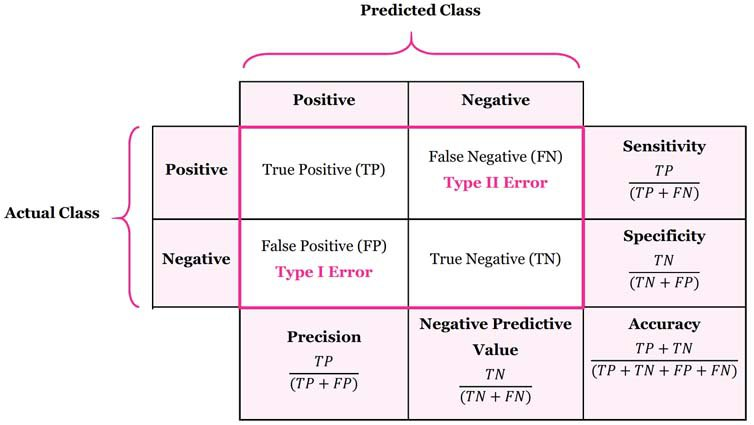

### 오차 행렬에서 나타나는 성능 지표를 다섯 가지

TP, FN, FP, TN의 수치로 계산되는 성능 지표 중 대표적으로 쓰이는 것은 정밀도(Precision), 재현율(Recall, Sensitivity), F1 스코어(f1 score) 입니다.

Recall은 위 그림에서 Sensitivity라고 표시된 지표와 같습니다. Sensitivity보다는 Recall이라는 용어가 더 보편적이니, 우리도 Recall이라고 부르겠습니다.

Precision과 Recall, F1 score, 그리고 원래 확인했던 정확도(Accuracy)까지 수식은 각각 다음과 같습니다.

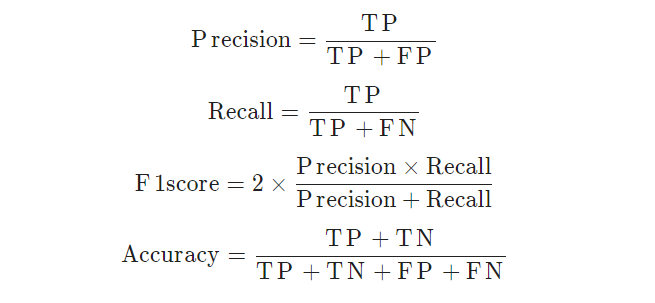

Precision과 Recall의 분자는 둘 다 TP입니다. TP는 맞게 판단한 양성이므로, 이 값은 높을수록 좋습니다.<br>
하지만 분모에는 각각 FP와 FN가 있습니다. 이 값들은 잘못 판단된 것들이므로 낮을수록 좋습니다.

즉 TP는 높고 FP또는 FN이 낮을수록 좋은 예측이므로, Precision과 Recall 값이 클수록 좋습니다. 다만, 둘은 다음과 같은 점이 다릅니다.

Precision은 분모에 있는 FP가 낮을수록 커집니다. Precision이 높아지려면 False Positive, 즉 음성인데 양성으로 판단하는 경우가 적어야 합니다.

Recall은 분모에 있는 FN이 낮을수록 커집니다. Recall이 높아지려면 False Negative, 즉 양성인데 음성으로 판단하는 경우가 적어야 합니다.

다시 생각해봅시다.

Precision이 크려면 음성인데 양성으로 판단하는 경우가 적어야 합니다. 음성을 놓치지 말아야 한다는 거죠!<br>
어떤 경우가 있을까요?
Recall이 크려면 양성인데 음성으로 판단하는 경우가 적어야 합니다. 양성을 놓치지 말아야 하죠. 이건 어떤 경우가 있을까요?

F1 score는 Recall과 Precision의 조화평균입니다. Accuracy는 앞서 설명했듯 전체 데이터 중 올바르게 판단한 데이터 개수의 비율이죠.

이제 이론은 이 정도로 마무리하고, scikit-learn으로 이 지표들을 확인하는 방법을 배워보겠습니다.

오차 행렬은 다음과 같이 sklearn.metrics 패키지 내의 confusion_matrix로 확인할 수 있습니다.

모델이 예측했던 손글씨 결과에 관해 확인해 보죠.



In [35]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)

array([[320,  13],
       [  9,  18]])

위에서 이미지로 봤던 오차 행렬과 같이 각각은 왼쪽 위부터 순서대로 TPTP, FNFN, FPFP, TNTN의 개수를 나타냅니다. <br>
특히, 손글씨 문제에서의 0은 Positive 역할을, 3은 Negative 역할을 합니다.

TP와 TNTN의 값이 320, 18로 비교적 크고 FNFN과 FPFP의 값은 13, 9로 작네요.

그러면 모든 숫자를 0으로 예측한 fake_pred의 경우는 어떨까요?

In [36]:
confusion_matrix(y_test, fake_pred)

array([[333,   0],
       [ 27,   0]])

네, 우리는 모든 데이터를 0, 즉 Positive로 예측했고 Negative로 예측한 것은 없기 때문에 FN과 TN은 둘 다 0입니다.

모델이 예측했던 손글씨 결과의 Precision, Recall, F1 score는 각각 얼마가 되는지 확인해 보죠. sklearn.metrics의 classification_report를 활용하면 각 지표를 한 번에 확인할 수 있습니다

In [37]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       333
           3       0.58      0.67      0.62        27

    accuracy                           0.94       360
   macro avg       0.78      0.81      0.79       360
weighted avg       0.94      0.94      0.94       360



여러 가지 점수가 출력되었습니다.  

0은 개수가 333개로 많기 때문에 precision과 recall에서 모두 0.97, 0.96으로 어렵지 않게 높은 점수를 받았습니다.<br>
반면 3은 27개뿐이기 때문에 모두 맞추기가 어려웠나 봅니다. precision과 recall은 각각 0.58, 0.67이 나왔군요.  

그렇다면 fake_pred는 어떨까요?  

In [38]:
print(classification_report(y_test, fake_pred, zero_division=0))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       333
           3       0.00      0.00      0.00        27

    accuracy                           0.93       360
   macro avg       0.46      0.50      0.48       360
weighted avg       0.86      0.93      0.89       360



이게 무슨 일이죠? 0에 대한 precision과 recall은 0.93, 1로 매우 높지만 3에 대한 precision과 recall은 둘 다 0입니다. 이건 큰 문제입니다. 0은 잘 잡아내지만, 3은 단 하나도 맞추지 못했다는 뜻이니까요.

다시 한번 정확도를 확인해봅시다.

In [39]:
accuracy_score(y_test, y_pred), accuracy_score(y_test, fake_pred)

(0.9388888888888889, 0.925)

y_pred와 fake_pred 모두 0.94, 0.925로 큰 차이가 없지만 이제는 알 수 있습니다. 모델의 성능은 정확도만으로 평가하면 안 된다는 것을요!

특히, label이 불균형하게 분포되어있는 데이터를 다룰 때는 더 조심해야 합니다.

Precision과 Recall이 각각 언제 중요해지는지를 이해하고, 앞으로는 상황에 맞는 성능지표로 모델을 평가하시길 바랍니다!